In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_path = '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/valid'

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from glob import glob

In [4]:
#import inceptionV3 model#
from tensorflow.keras.applications.inception_v3 import InceptionV3

image_size = [224, 224, 3]
inception = InceptionV3(input_shape = image_size, #shape of our images#
                        weights = 'imagenet', ##
                        include_top = False) #We are going to use all the layers in the model except for the last fully connected layeras#
                                                #as it is specific to the ImageNet competition.#

87916544/87910968 [==============================] - 1s 0us/step


In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
folders = glob('/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/*')

In [7]:
#Flatten the output layer to 1 dimention#
x = Flatten()(inception.output)

In [8]:
#add a fully conected layer with 10 hidden untis and softmax activation #
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [9]:
#Add our data-augmentation parameters to ImageDataGenerator#
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, #Normalization#
                                   shear_range = 0.2, #for randomly applying shearing transformations#
                                   zoom_range = 0.2, #for randomly zooming inside pictures#
                                   horizontal_flip = True) #is for randomly flipping half of the images horizontally#

#the validation data should not be agumentated#
test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory(train_path, #directory for training images#
                                                 target_size = (224, 224), #all images will be resized to 250x250#
                                                 batch_size = 32, #flow images in batches of 20#
                                                 class_mode = 'categorical') #binary_crossentropy loss if data were binary#

test_set = test_datagen.flow_from_directory(valid_path, 
                                            target_size = (224, 224), 
                                            batch_size = 32, 
                                            class_mode = 'categorical') 


Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [17]:
# training the model

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

Epoch 1/3
574/574 [==============================] - 1318s 2s/step - loss: 2.1827 - accuracy: 0.7911 - val_loss: 2.7664 - val_accuracy: 0.7692
Epoch 2/3
574/574 [==============================] - 1331s 2s/step - loss: 2.0342 - accuracy: 0.8241 - val_loss: 1.9969 - val_accuracy: 0.8279
Epoch 3/3
574/574 [==============================] - 1326s 2s/step - loss: 1.9704 - accuracy: 0.8406 - val_loss: 2.4027 - val_accuracy: 0.8233


In [18]:
valid_loss, valid_acc = model.evaluate_generator(test_set, steps=len(test_set))
print(f"Final validation accuracy: {valid_acc*100:.2f}%")

Final validation accuracy: 82.33%


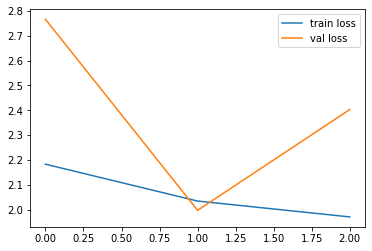

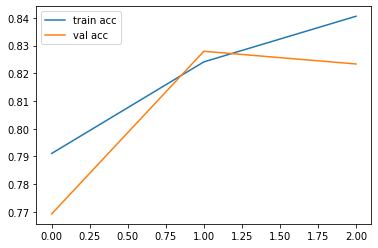

<Figure size 432x288 with 0 Axes>

In [19]:
# plotting the loss


plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plotting the accuracy


plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
yhat_predict = model.predict(test_set)
yhat_predict = np.argmax(yhat_predict, axis = 1)
yhat_predict

array([5, 0, 9, ..., 8, 9, 2])